In [1]:
import copy as cp
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt

In [2]:
rmsd = np.load('trajs_from_bhuppi/rmsd1_from_bhupi.npz')
rmsd = [rmsd[i] for i in list(rmsd)]

In [3]:
len(rmsd)

9

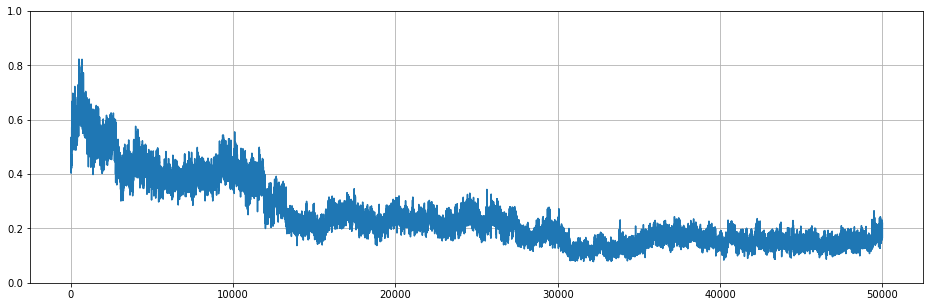

In [5]:
fig,ax=plt.subplots(1,figsize=(16,5))
ax.plot(rmsd[5])
ax.set_ylim(0,1)
ax.grid()

In [6]:
crmsd = np.concatenate((rmsd))
bins = np.arange(0,1.2,0.01)
xb = bins[1:] - (bins[0]+bins[1])/2
hist, _ = np.histogram(crmsd, density=True, bins=bins)

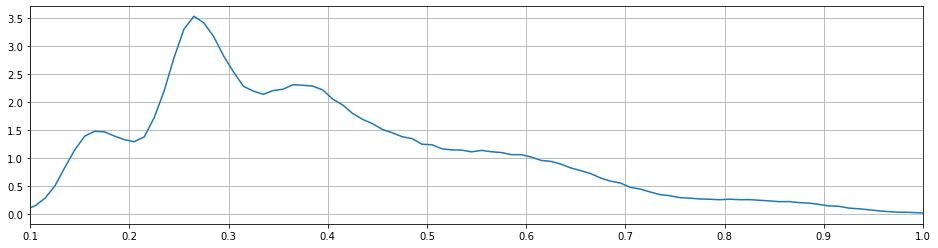

In [7]:
plt.figure(figsize=(16,4))
plt.plot(xb,hist)
plt.xlim(0.1,1)
plt.grid()

In [8]:
np.where(crmsd < 0.2)[0].shape[0]/crmsd.shape[0]

0.10061098516777224

In [9]:
np.round([np.where(i < 0.2)[0].shape[0]/i.shape[0] for i in rmsd], 2)

array([0.  , 0.  , 0.1 , 0.  , 0.  , 0.48, 0.05, 0.  , 0.26])

In [10]:
labels = [np.zeros((len(i))) for i in rmsd]
for i in range(len(rmsd)):
    labels[i][np.where(rmsd[i]<0.2)[0]] = 1

In [11]:
np.savez('labels.npz', *labels)